In [2]:
# Install Tensorflow
!pip install Tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 738.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 154.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 140.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.3 MB/s eta 0:00:00


In [3]:
# import neccesary libraries and frameworks
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [4]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Structure of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# Visualize the images along with digits
def visualize(i):
  plt.imshow(X_train[i],cmap='binary')
  plt.title(y_train[i])
  plt.show()

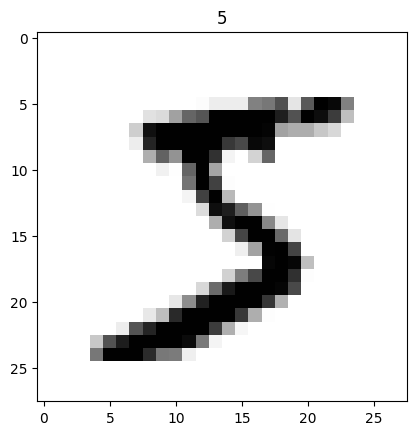

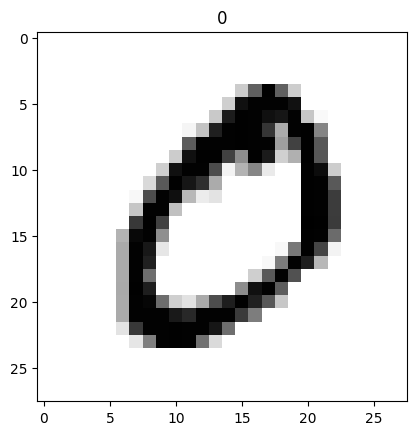

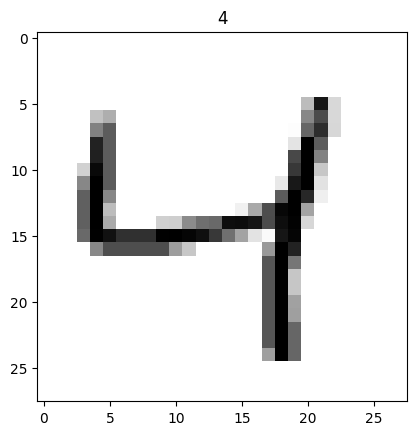

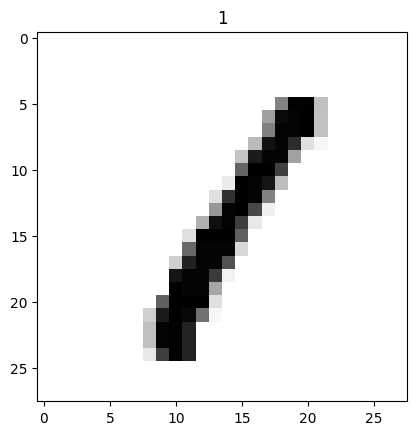

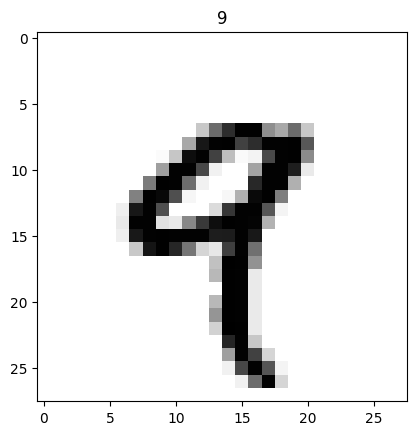

In [7]:
# Visualize first 5 images along with digit value
for i in range(5):
  visualize(i)

Pre - Processing

In [8]:
# Normalizing the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

In [9]:
# Reshape/expand the dimensions of images from (x,28,28) to (x,28,28,1)    # x --> Num of records
X_train = np.expand_dims(X_train, -1)
X_test  = np.expand_dims(X_test, -1)

In [10]:
X_train.shape   # 4th dimension is color, 1 --> Gray

(60000, 28, 28, 1)

In [11]:
# One-Hot encoding (classes or labels to one-hot vector)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [13]:
# Build a model
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
# Callback
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

# Model Check Point
mc = ModelCheckpoint("./bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only = True)

cb = [es,mc]

In [17]:
# Model Training
his = model.fit(X_train, y_train, epochs=50, validation_split=0.3, callbacks=cb)

Epoch 1/50
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8540 - loss: 0.4738
Epoch 1: val_accuracy improved from -inf to 0.97372, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8546 - loss: 0.4716 - val_accuracy: 0.9737 - val_loss: 0.0863
Epoch 2/50
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9753 - loss: 0.0817
Epoch 2: val_accuracy improved from 0.97372 to 0.97939, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9754 - loss: 0.0817 - val_accuracy: 0.9794 - val_loss: 0.0658
Epoch 3/50
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9823 - loss: 0.0563
Epoch 3: val_accuracy improved from 0.97939 to 0.98189, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9823 - loss: 0.0563 - val_accuracy: 0.9819 - val_loss: 0.0549
Epoch 4/50
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9861 - loss: 0.0439
Epoch 4: val_accuracy improved from 0.98189 to 0.98611, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9861 - loss: 0.0439 - val_accuracy: 0.9861 - val_loss: 0.0457
Epoch 5/50
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9882 - loss: 0.0373
Epoch 5: val_accuracy did not improve from 0.98611
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9882 - loss: 0.0373 - val_accuracy: 0.9854 - val_loss: 0.0484
Epoch 6/50
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9895 - loss: 0.0331
Epoch 6: val_accuracy improved from 0.98611 to 0.98644, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9895 - loss: 0.0331 - val_accuracy: 0.9864 - val_loss: 0.0433
Epoch 7/50
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9905 - loss: 0.0284
Epoch 7: val_accuracy improved from 0.98644 to 0.98778, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9905 - loss: 0.0284 - val_accuracy: 0.9878 - val_loss: 0.0430
Epoch 8/50
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0234
Epoch 8: val_accuracy did not improve from 0.98778
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9922 - loss: 0.0234 - val_accuracy: 0.9871 - val_loss: 0.0439
Epoch 8: early stopping


In [18]:
# Load saved model
model_S = keras.models.load_model("/content/bestmodel.h5")

In [19]:
# Evaluate the performance of the model which is saved in 'bestmodel.h5'
score = model_S.evaluate(X_test,y_test)
print("The accuracy of the model is",score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9888 - loss: 0.0366
The accuracy of the model is 0.9915000200271606
